# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Incorporates ratelimit to prevent exceeding API call limit
from ratelimit import limits, sleep_and_retry

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)


#let's start with a smaller list of cities 
lats = np.random.uniform(lat_range[0], lat_range[1], size=75)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=75)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

60
['iqaluit', 'jalu', 'yar-sale', 'coihaique', 'bengkulu', 'albany', 'hasaki', 'diapaga', 'wagar', 'punta arenas', 'pevek', 'busselton', 'ushuaia', 'chicama', 'hobart', 'mataura', 'totness', 'hamilton', 'gat', 'anaconda', 'kapaa', 'murashi', 'qaanaaq', 'rikitea', 'san carlos del zulia', 'mahibadhoo', 'bluff', 'kruisfontein', 'camacha', 'sangar', 'kodiak', 'ayorou', 'tuktoyaktuk', 'barentsburg', 'bredasdorp', 'cidreira', 'tsihombe', 'vaini', 'atuona', 'belushya guba', 'chokurdakh', 'mahebourg', 'agsu', 'constitucion', 'butaritari', 'souillac', 'victoria', 'olinda', 'srednekolymsk', 'port elizabeth', 'avarua', 'tautira', 'asilah', 'port alfred', 'nanortalik', 'castro', 'marrakesh', 'juegang', 'bulawayo', 'vaitupu']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

#initialize the lists
cloudiness = []
country = []
date = []
humidity = []
longitude = []
latitude = []
max_temp = []
wind_speed = []
city_name = []
city_id = []


In [48]:
record_counter = 0
set_counter = 0
units = "imperial"

for city in cities:
    # Build query URL 
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    if cities.index(city)%50==0:
        time.sleep(10)
        set_counter += 1
        record_counter = 0
    else:
        record_counter +=1
    
    print(f"Processing record {record_counter} of set {set_counter} | {city}") 
    
    weather_json = requests.get(query_url).json()
    try:  
        longitude.append(weather_json["coord"]["lon"])
        latitude.append(weather_json["coord"]["lat"])
        max_temp.append(weather_json["main"]["temp_max"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        wind_speed.append(weather_json["wind"]["speed"])
        city_name.append(city)
        city_id.append(weather_json["id"])
    except:
        print(f"City {city} not found. Continuing...")

    
        

Processing record 0 of set 1 | iqaluit
Processing record 1 of set 1 | jalu
Processing record 2 of set 1 | yar-sale
Processing record 3 of set 1 | coihaique
Processing record 4 of set 1 | bengkulu
Processing record 5 of set 1 | albany
Processing record 6 of set 1 | hasaki
Processing record 7 of set 1 | diapaga
Processing record 8 of set 1 | wagar
Processing record 9 of set 1 | punta arenas
Processing record 10 of set 1 | pevek
Processing record 11 of set 1 | busselton
Processing record 12 of set 1 | ushuaia
Processing record 13 of set 1 | chicama
Processing record 14 of set 1 | hobart
Processing record 15 of set 1 | mataura
Processing record 16 of set 1 | totness
Processing record 17 of set 1 | hamilton
Processing record 18 of set 1 | gat
Processing record 19 of set 1 | anaconda
Processing record 20 of set 1 | kapaa
Processing record 21 of set 1 | murashi
Processing record 22 of set 1 | qaanaaq
Processing record 23 of set 1 | rikitea
Processing record 24 of set 1 | san carlos del zulia


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
print(city_list)

In [51]:
#store the required data
# create a data frame from cities, lat, and other retrieved data
weather_dict = {
            "city": city_name,
            "city_id": city_id,
            "lat": latitude,
            "max_temp": max_temp,
            "cloudiness": cloudiness,
            "country": country,
            "date": date,
            "humidity": humidity,
            "long": longitude,
            "wind_speed": wind_speed
    
        }
weather_data = pd.DataFrame(weather_dict)
weather_data
weather_data.to_csv(output_data_file)

In [ ]:
#sample starter file data

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
remove_hum = weather_data.loc[weather_data.humidity < 101]
remove_hum

,city,lat,max_temp,cloudiness,country,date,humidity,long,wind_speed
0,iqaluit,63.75,264.15,90,CA,1607208630,85,-68.51,7.20
1,jalu,29.03,291.00,19,LY,1607208862,29,21.55,7.68
2,yar-sale,66.83,261.30,57,RU,1607208862,96,70.83,3.83
3,coihaique,-45.58,299.15,0,CL,1607208862,31,-72.07,3.10
4,bengkulu,-3.80,297.70,95,ID,1607208863,80,102.27,2.16
...,...,...,...,...,...,...,...,...,...
160,nanortalik,60.14,272.34,99,GL,1607208784,98,-45.24,1.04
161,castro,-24.79,289.16,100,BR,1607208883,96,-50.01,6.65
162,marrakesh,31.63,282.15,40,MA,1607208884,87,-8.01,1.50
163,juegang,32.32,280.93,0,CN,1607208884,74,121.19,1.34


In [60]:
weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        165 non-null    object 
 1   lat         165 non-null    float64
 2   max_temp    165 non-null    float64
 3   cloudiness  165 non-null    int64  
 4   country     165 non-null    object 
 5   date        165 non-null    int64  
 6   humidity    165 non-null    int64  
 7   long        165 non-null    float64
 8   wind_speed  165 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 11.7+ KB


In [72]:
#  Get the indices of cities that have humidity over 100%.
over_hundred = []
over_hundred = weather_data.loc[weather_data.humidity > 100].index
over_hundred

Int64Index([  2,   6,   8,  21,  45,  50,  51,  54,  57,  61,  63,  76, 100,
            105, 106, 109, 112, 116, 118, 131, 155, 160, 161, 164],
           dtype='int64')

In [ ]:

labels = over_hundred.index

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [73]:
clean_city_data = weather_data.drop(weather_data.index[over_hundred], inplace = False)
clean_city_data

,city,lat,max_temp,cloudiness,country,date,humidity,long,wind_speed
0,iqaluit,63.75,264.15,90,CA,1607208630,85,-68.51,7.20
1,jalu,29.03,291.00,19,LY,1607208862,29,21.55,7.68
3,coihaique,-45.58,299.15,0,CL,1607208862,31,-72.07,3.10
4,bengkulu,-3.80,297.70,95,ID,1607208863,80,102.27,2.16
5,albany,42.60,277.04,100,US,1607208758,60,-73.97,2.68
...,...,...,...,...,...,...,...,...,...
157,tautira,-17.73,304.15,40,PF,1607208883,62,-149.15,3.10
158,asilah,35.47,286.15,40,MA,1607208883,54,-6.03,4.60
159,port alfred,-33.59,293.31,80,ZA,1607208883,88,26.89,8.75
162,marrakesh,31.63,282.15,40,MA,1607208884,87,-8.01,1.50


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [91]:
today = date.today()
today

datetime.date(2020, 12, 5)

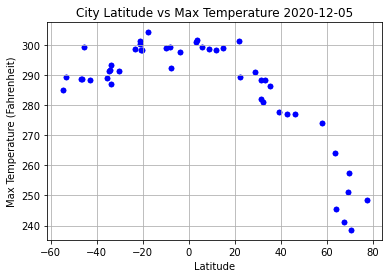

In [94]:
clean_city_data.plot(kind='scatter', x='lat', y='max_temp',color = 'blue' )
title = f"City Latitude vs Max Temperature {today}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.grid()
plt.savefig("graphs/lat_temp.png")


## Latitude vs. Humidity Plot

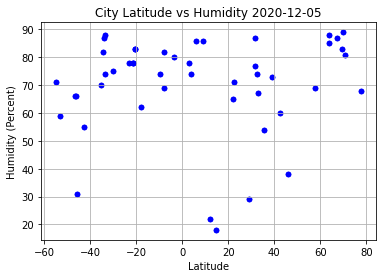

In [95]:
clean_city_data.plot(kind='scatter', x='lat', y='humidity',color = 'blue' )
title = f"City Latitude vs Humidity {today}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Humidity (Percent)')
plt.grid()
plt.savefig("graphs/lat_humidity.png")

## Latitude vs. Cloudiness Plot

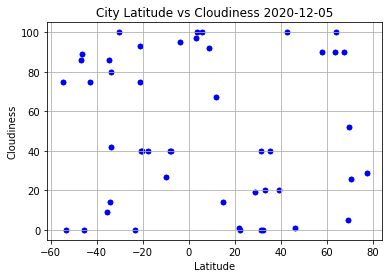

In [96]:
clean_city_data.plot(kind='scatter', x='lat', y='cloudiness',color = 'blue' )
title = f"City Latitude vs Cloudiness {today}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig("graphs/lat_cloudiness.png")

## Latitude vs. Wind Speed Plot

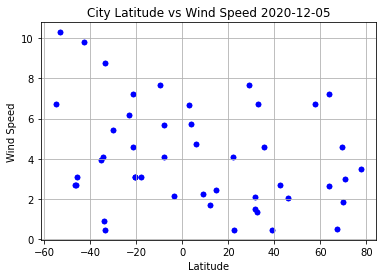

In [97]:
clean_city_data.plot(kind='scatter', x='lat', y='wind_speed',color = 'blue' )
title = f"City Latitude vs Wind Speed {today}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig("graphs/lat_windspeed.png")

## Linear Regression

In [98]:

northern = clean_city_data.loc[clean_city_data.lat >= 0]
northern.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 163
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        75 non-null     object 
 1   lat         75 non-null     float64
 2   max_temp    75 non-null     float64
 3   cloudiness  75 non-null     int64  
 4   country     75 non-null     object 
 5   date        75 non-null     int64  
 6   humidity    75 non-null     int64  
 7   long        75 non-null     float64
 8   wind_speed  75 non-null     float64
dtypes: float64(4), int64(3), object(2)
memory usage: 5.9+ KB


In [99]:
southern = clean_city_data.loc[clean_city_data.lat < 0]
southern.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 3 to 159
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        66 non-null     object 
 1   lat         66 non-null     float64
 2   max_temp    66 non-null     float64
 3   cloudiness  66 non-null     int64  
 4   country     66 non-null     object 
 5   date        66 non-null     int64  
 6   humidity    66 non-null     int64  
 7   long        66 non-null     float64
 8   wind_speed  66 non-null     float64
dtypes: float64(4), int64(3), object(2)
memory usage: 5.2+ KB


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

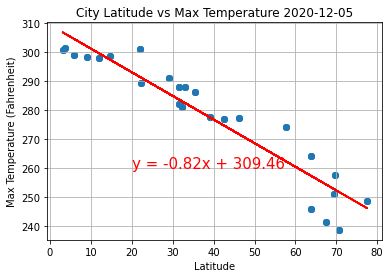

In [102]:
x_values = northern.lat
y_values = northern.max_temp
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,260),fontsize=15,color="red")
title = f"Northern Hemisphere:City Latitude vs Max Temperature {today}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.grid()
plt.savefig("graphs/northern_lat_temp.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

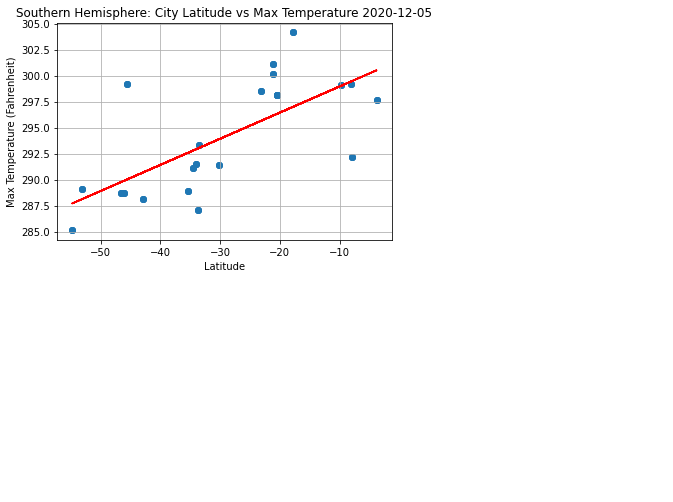

In [103]:
x_values = southern.lat
y_values = southern.max_temp
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,260),fontsize=15,color="red")
title = f"Southern Hemisphere: City Latitude vs Max Temperature {today}"
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.grid()
plt.savefig("graphs/southern_lat_temp.png")

In [ ]:
Analysis:

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression